## Import

In [0]:
from keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Conv2DTranspose, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers 
from keras.layers.normalization import BatchNormalization as bn
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.models import model_from_json

Using TensorFlow backend.


In [0]:
import keras.backend as K
import tensorflow as tf

In [0]:
!pip install nibabel

In [0]:
import nibabel as nib
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle

In [0]:
from google.colab import drive
drive.mount("/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
cd /gdrive/My \Drive/LITS/Dataset/

/gdrive/My Drive/Torrent/LITS17


In [0]:
ls

model_json_final.json   segmentation-39.nii  total_mask.npy   volume-40.nii
model_json.json         segmentation-3.nii   total_patch.npy  volume-41.nii
model_weights_final.h5  segmentation-40.nii  volume-0.nii     volume-42.nii
model_weights.h5        segmentation-41.nii  volume-100.nii   volume-43.nii
segmentation-0.nii      segmentation-42.nii  volume-101.nii   volume-44.nii
segmentation-100.nii    segmentation-43.nii  volume-102.nii   volume-45.nii
segmentation-101.nii    segmentation-44.nii  volume-103.nii   volume-46.nii
segmentation-102.nii    segmentation-45.nii  volume-104.nii   volume-47.nii
segmentation-103.nii    segmentation-46.nii  volume-105.nii   volume-48.nii
segmentation-104.nii    segmentation-47.nii  volume-106.nii   volume-49.nii
segmentation-105.nii    segmentation-48.nii  volume-107.nii   volume-4.nii
segmentation-106.nii    segmentation-49.nii  volume-108.nii   volume-50.nii
segmentation-107.nii    segmentation-4.nii   volume-109.nii   volume-51.nii
segmentation-

In [0]:
img_path = glob("volume-*.nii")
mask_path = glob("segmentation-*.nii")

print("Number of images :", len(img_path))

Number of images : 128


In [0]:
img_path

['volume-1.nii',
 'volume-0.nii',
 'volume-10.nii',
 'volume-100.nii',
 'volume-101.nii',
 'volume-102.nii',
 'volume-103.nii',
 'volume-104.nii',
 'volume-105.nii',
 'volume-106.nii',
 'volume-107.nii',
 'volume-108.nii',
 'volume-109.nii',
 'volume-110.nii',
 'volume-11.nii',
 'volume-112.nii',
 'volume-111.nii',
 'volume-114.nii',
 'volume-113.nii',
 'volume-115.nii',
 'volume-116.nii',
 'volume-117.nii',
 'volume-118.nii',
 'volume-12.nii',
 'volume-119.nii',
 'volume-121.nii',
 'volume-120.nii',
 'volume-122.nii',
 'volume-123.nii',
 'volume-124.nii',
 'volume-125.nii',
 'volume-126.nii',
 'volume-22.nii',
 'volume-2.nii',
 'volume-13.nii',
 'volume-130.nii',
 'volume-129.nii',
 'volume-26.nii',
 'volume-21.nii',
 'volume-17.nii',
 'volume-127.nii',
 'volume-24.nii',
 'volume-23.nii',
 'volume-14.nii',
 'volume-16.nii',
 'volume-15.nii',
 'volume-19.nii',
 'volume-20.nii',
 'volume-25.nii',
 'volume-18.nii',
 'volume-45.nii',
 'volume-31.nii',
 'volume-28.nii',
 'volume-32.nii',
 

In [0]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [0]:
img_path.sort(key=natural_keys)
mask_path.sort(key=natural_keys)

In [0]:
img_path

['volume-0.nii',
 'volume-1.nii',
 'volume-2.nii',
 'volume-3.nii',
 'volume-4.nii',
 'volume-5.nii',
 'volume-6.nii',
 'volume-7.nii',
 'volume-8.nii',
 'volume-10.nii',
 'volume-11.nii',
 'volume-12.nii',
 'volume-13.nii',
 'volume-14.nii',
 'volume-15.nii',
 'volume-16.nii',
 'volume-17.nii',
 'volume-18.nii',
 'volume-19.nii',
 'volume-20.nii',
 'volume-21.nii',
 'volume-22.nii',
 'volume-23.nii',
 'volume-24.nii',
 'volume-25.nii',
 'volume-26.nii',
 'volume-27.nii',
 'volume-28.nii',
 'volume-29.nii',
 'volume-30.nii',
 'volume-31.nii',
 'volume-32.nii',
 'volume-33.nii',
 'volume-34.nii',
 'volume-35.nii',
 'volume-36.nii',
 'volume-37.nii',
 'volume-38.nii',
 'volume-39.nii',
 'volume-40.nii',
 'volume-41.nii',
 'volume-42.nii',
 'volume-43.nii',
 'volume-44.nii',
 'volume-45.nii',
 'volume-46.nii',
 'volume-47.nii',
 'volume-48.nii',
 'volume-49.nii',
 'volume-50.nii',
 'volume-51.nii',
 'volume-52.nii',
 'volume-53.nii',
 'volume-54.nii',
 'volume-55.nii',
 'volume-56.nii',
 

## Utils

In [0]:
patch_ratio = []

for i in range(16 + 1):
  patch_ratio.append(32 * i)

In [0]:
patch_ratio

[0,
 32,
 64,
 96,
 128,
 160,
 192,
 224,
 256,
 288,
 320,
 352,
 384,
 416,
 448,
 480,
 512]

In [0]:
def patch_sampling(img, mask, patch_ratio, pos_neg_ratio, threshold):
  
  temp_mask = mask
  
  temp_mask[temp_mask == 1] = 0
  temp_mask[temp_mask == 2] = 1
  
  positive_patch = []
  positive_mask = []
  
  negative_patch = []
  negative_mask = []
  
  negative_set = []
  
  
  for i in range(temp_mask.shape[2]):
    for x_bin in range(2, len(patch_ratio)):
        for y_bin in range(2, len(patch_ratio)):
          img_patch = img[patch_ratio[x_bin-2] : patch_ratio[x_bin], patch_ratio[y_bin - 2] : patch_ratio[y_bin], i]
          mask_patch = temp_mask[patch_ratio[x_bin-2] : patch_ratio[x_bin], patch_ratio[y_bin - 2] : patch_ratio[y_bin], i]
          _, count = np.unique(mask_patch, return_counts = True)
          
          if len(count) == 2:
            mask_percentage = count[1] / sum(count) * 100
          
            if threshold < mask_percentage :
              positive_patch.append(img_patch)
              positive_mask.append(mask_patch)
          
          
          elif len(count) ==1:
            
            temp_list = []
            temp_list.append(img_patch)
            temp_list.append(mask_patch)
            
            negative_set.append(temp_list)
  
  shuffle(negative_set)
  
  negative_set_to_use = negative_set[:len(positive_patch) * pos_neg_ratio]
  for negative_set in negative_set_to_use:
    negative_patch.append(negative_set[0])
    negative_mask.append(negative_set[1])
  
  negative_set_to_use = []
  
  return positive_patch, positive_mask, negative_patch, negative_mask

In [0]:
def slice_to_patch(slice, patch_ratio):
  
  slice[slice == 1] = 0
  slice[slice == 2] = 1
  
  patch_list = []
  
  for x_bin in range(2, len(patch_ratio)):
    for y_bin in range(2, len(patch_ratio)):
      patch = slice[patch_ratio[x_bin-2] : patch_ratio[x_bin], patch_ratio[y_bin - 2] : patch_ratio[y_bin]]
      patch = patch.reshape(patch.shape + (1,))
      patch_list.append(patch)
  
  return np.array(patch_list)

In [0]:
def patch_to_slice(patch, patch_ratio, input_shape, conf_threshold):
  
  slice = np.zeros((512, 512, 1))
  row_idx = 0
  col_idx = 0
  
  for i in range(len(patch)):
    
    slice[patch_ratio[row_idx]:patch_ratio[row_idx + 2], patch_ratio[col_idx]:patch_ratio[col_idx + 2]][patch[i] > conf_threshold] = 1
    
    col_idx += 1
    
    if i != 0 and (i+1) % 15 == 0:
      row_idx += 1
      col_idx = 0
  
  return slice

In [0]:
def weighted_binary_crossentropy(y_true, y_pred):
    y_pred = tf.clip_by_value(y_pred, 10e-8, 1.-10e-8)
    loss = - (y_true * K.log(y_pred) * 0.90 + (1 - y_true) * K.log(1 - y_pred) * 0.10)
    
    return K.mean(loss)

In [0]:
# Reference : https://github.com/dk67604/LITS-Challenge-Liver-Segmentation/blob/master/experiments/keras_realtime_train.ipynb

smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

## Model

In [0]:
input_shape = [64, 64, 1]
dropout_rate = 0.3
l2_lambda = 0.0002

In [0]:
def u_net(input_shape, dropout_rate, l2_lambda):
  
  # Encoder
  input = Input(shape = input_shape, name = "input")
  conv1_1 = Conv2D(32, (3, 3), padding = "same", activation='relu', kernel_regularizer=regularizers.l2(l2_lambda), name = "conv1_1")(input)
  conv1_1 = bn(name = "conv1_1_bn")(conv1_1)
  conv1_2 = Conv2D(32, (3, 3), padding = "same", activation='relu', kernel_regularizer=regularizers.l2(l2_lambda), name = "conv1_2")(conv1_1)
  conv1_2 = bn(name = "conv1_2_bn")(conv1_2)
  pool1 = MaxPooling2D(name = "pool1")(conv1_2)
  drop1 = Dropout(dropout_rate)(pool1)
  
  conv2_1 = Conv2D(64, (3, 3), padding = "same", activation='relu', kernel_regularizer=regularizers.l2(l2_lambda), name = "conv2_1")(pool1)
  conv2_1 = bn(name = "conv2_1_bn")(conv2_1)
  conv2_2 = Conv2D(64, (3, 3), padding = "same", activation='relu', kernel_regularizer=regularizers.l2(l2_lambda), name = "conv2_2")(conv2_1)
  conv2_2 = bn(name = "conv2_2_bn")(conv2_2)
  pool2 = MaxPooling2D(name = "pool2")(conv2_2)
  drop2 = Dropout(dropout_rate)(pool2)
  
  conv3_1 = Conv2D(128, (3, 3), padding = "same", activation='relu', kernel_regularizer=regularizers.l2(l2_lambda), name = "conv3_1")(pool2)
  conv3_1 = bn(name = "conv3_1_bn")(conv3_1)
  conv3_2 = Conv2D(128, (3, 3), padding = "same", activation='relu', kernel_regularizer=regularizers.l2(l2_lambda), name = "conv3_2")(conv3_1)
  conv3_2 = bn(name = "conv3_2_bn")(conv3_2)
  pool3 = MaxPooling2D(name = "pool3")(conv3_2)
  drop3 = Dropout(dropout_rate)(pool3)  

  conv4_1 = Conv2D(256, (3, 3), padding = "same", activation='relu', kernel_regularizer=regularizers.l2(l2_lambda), name = "conv4_1")(pool3)
  conv4_1 = bn(name = "conv4_1_bn")(conv4_1)
  conv4_2 = Conv2D(256, (3, 3), padding = "same", activation='relu', kernel_regularizer=regularizers.l2(l2_lambda), name = "conv4_2")(conv4_1)
  conv4_2 = bn(name = "conv4_2_bn")(conv4_2)
  pool4 = MaxPooling2D(name = "pool4")(conv4_2)
  drop4 = Dropout(dropout_rate)(pool4)  

  conv5_1 = Conv2D(512, (3, 3), padding = "same", activation='relu', kernel_regularizer=regularizers.l2(l2_lambda), name = "conv5_1")(pool4)
  conv5_1 = bn(name = "conv5_1_bn")(conv5_1)
  conv5_2 = Conv2D(512, (3, 3), padding = "same", activation='relu', kernel_regularizer=regularizers.l2(l2_lambda), name = "conv5_2")(conv5_1)
  conv5_2 = bn(name = "conv5_2_bn")(conv5_2)
  
  # Decoder
  upconv6 = Conv2DTranspose(256,(2, 2), strides=(2, 2), padding='same')(conv5_2)
  upconv6 = Dropout(dropout_rate)(upconv6)
  concat6 = concatenate([conv4_2, upconv6], name = "concat6")
  conv6_1 = Conv2D(256, (3, 3), padding = "same", kernel_regularizer=regularizers.l2(l2_lambda), name = "conv6_1")(concat6)
  conv6_1 = bn(name = "conv6_1_bn")(conv6_1)
  conv6_2 = Conv2D(256, (3, 3), padding = "same", kernel_regularizer=regularizers.l2(l2_lambda), name = "conv6_2")(conv6_1)
  conv6_2 = bn(name = "conv6_2_bn")(conv6_2)
    
  upconv7 = Conv2DTranspose(128,(2, 2), strides=(2, 2), padding='same')(conv6_2)
  upconv7 = Dropout(dropout_rate)(upconv7)
  concat7 = concatenate([conv3_2, upconv7], name = "concat7")
  conv7_1 = Conv2D(128, (3, 3), padding = "same", kernel_regularizer=regularizers.l2(l2_lambda), name = "conv7_1")(concat7)
  conv7_1 = bn(name = "conv7_1_bn")(conv7_1)
  conv7_2 = Conv2D(128, (3, 3), padding = "same", kernel_regularizer=regularizers.l2(l2_lambda), name = "conv7_2")(conv7_1)
  conv7_2 = bn(name = "conv7_2_bn")(conv7_2)

  upconv8 = Conv2DTranspose(64,(2, 2), strides=(2, 2), padding='same')(conv7_2)
  upconv8 = Dropout(dropout_rate)(upconv8)
  concat8 = concatenate([conv2_2, upconv8], name = "concat8")
  conv8_1 = Conv2D(64, (3, 3), padding = "same", kernel_regularizer=regularizers.l2(l2_lambda), name = "conv8_1")(concat8)
  conv8_1 = bn(name = "conv8_1_bn")(conv8_1)
  conv8_2 = Conv2D(64, (3, 3), padding = "same", kernel_regularizer=regularizers.l2(l2_lambda), name = "conv8_2")(conv8_1)
  conv8_2 = bn(name = "conv8_2_bn")(conv8_2)

  upconv9 = Conv2DTranspose(32,(2, 2), strides=(2, 2), padding='same')(conv8_2)
  upconv9 = Dropout(dropout_rate)(upconv9)
  concat9 = concatenate([conv1_2, upconv9], name = "concat9")
  conv9_1 = Conv2D(32, (3, 3), padding = "same", kernel_regularizer=regularizers.l2(l2_lambda), name = "conv9_1")(concat9)
  conv9_1 = bn(name = "conv9_1_bn")(conv9_1)
  conv9_2 = Conv2D(32, (3, 3), padding = "same", kernel_regularizer=regularizers.l2(l2_lambda), name = "conv9_2")(conv9_1)
  conv9_2 = bn(name = "conv9_2_bn")(conv9_2)
  dropout = Dropout(dropout_rate)(conv9_2)
  
  conv10 = Conv2D(1, (1, 1), padding = "same", activation = 'sigmoid', name = "conv10")(dropout)

 
  model = Model(input, conv10)
  
  return model

In [0]:
model = u_net(input_shape, dropout_rate, l2_lambda)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 64, 64, 32)   320         input[0][0]                      
__________________________________________________________________________________________________
conv1_1_bn (BatchNormalization) (None, 64, 64, 32)   128         conv1_1[0][0]                    
__________________________________________________________________________________________________
conv1_2 (Conv2D)                (None, 64, 64, 32)   9248        conv1_1_bn[0][0]                 
____________________________________________________________________________________________

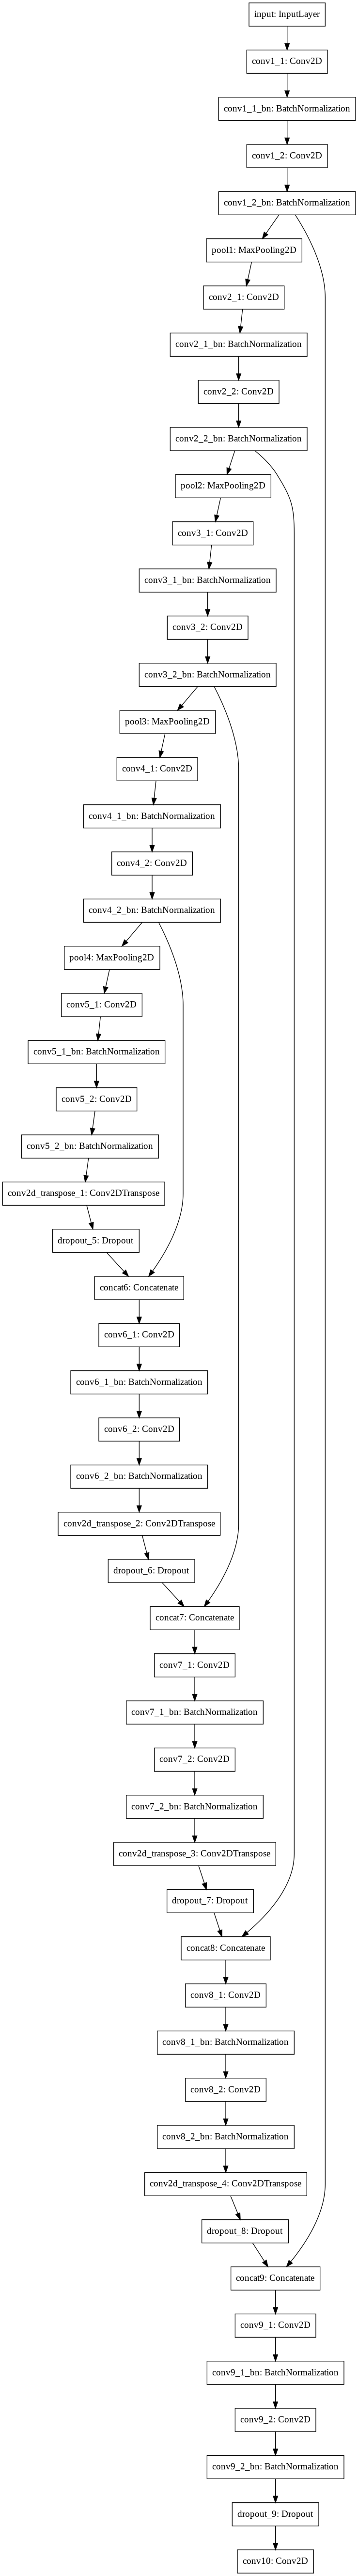

In [0]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)


## Training

__Data__

In [0]:
total_data = 0
total_patch = []
total_mask = []

for i in range(len(img_path) - 105):
  
  img_3D = nib.load(img_path[i]).get_data()
  mask_3D = nib.load(mask_path[i]).get_data()
  
  pos_patch, pos_mask, neg_patch, neg_mask = patch_sampling(img_3D, mask_3D, patch_ratio, 3, 3.0)
  total_patch += (pos_patch + neg_patch)
  total_mask += (pos_mask + neg_mask)

  print("======= Step [{0} / {1}] : # of patches = {2} | # of total training images = {3} =======".
        format(format(i+1, '>2'), len(img_path), format(len(pos_patch) + len(neg_patch), '>5'), format(len(total_patch), '>5')))

======= Step [ 1 / 128] : # of patches =   116 | # of total training images =   116 =======
======= Step [ 2 / 128] : # of patches =   336 | # of total training images =   452 =======
======= Step [ 3 / 128] : # of patches =   544 | # of total training images =   996 =======
======= Step [ 4 / 128] : # of patches =   160 | # of total training images =  1156 =======
======= Step [ 5 / 128] : # of patches = 19832 | # of total training images = 20988 =======
======= Step [ 6 / 128] : # of patches =     0 | # of total training images = 20988 =======
======= Step [ 7 / 128] : # of patches =  1380 | # of total training images = 22368 =======
======= Step [ 8 / 128] : # of patches =  1224 | # of total training images = 23592 =======
======= Step [ 9 / 128] : # of patches =   888 | # of total training images = 24480 =======
======= Step [10 / 128] : # of patches =  1012 | # of total training images = 25492 =======
======= Step [11 / 128] : # of patches =   528 | # of total training images = 26

In [0]:
mask_3D.shape

(512, 512, 391)

In [0]:
total_patch = np.array(total_patch).reshape((len(total_patch), 64, 64, 1))
total_mask = np.array(total_mask).reshape((len(total_mask), 64, 64, 1))

In [0]:
cd /gdrive/My \Drive/LITS/

In [0]:
np.save("total_patch.npy", total_patch)
np.save("total_mask.npy", total_mask)

In [0]:
cd /gdrive/My \Drive/LITS/

In [0]:
total_patch=np.load("total_patch.npy")
total_mask=np.load("total_mask.npy")

In [0]:
total_mask.shape

(39640, 64, 64, 1)

__Training__

In [0]:
adam = Adam(lr = 0.0001)

In [0]:
model.compile(optimizer = adam, loss = weighted_binary_crossentropy, metrics = [dice_coef])

model.fit(total_patch, total_mask, batch_size = 512, epochs = 10)

#model = model.get_layer("model_7")

model_json = model.to_json()
with open("model_json_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_weights_final.h5")
print("Saved model to disk")






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
 1024/39640 [..............................] - ETA: 13:16 - loss: 0.6608 - dice_coef: 0.1084

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-27-eaad589b2379>", line 3, in <module>
    model.fit(total_patch, total_mask, batch_size = 512, epochs = 10)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1178, in fit
    validation_freq=validation_freq)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training_arrays.py", line 204, in fit_loop
    outs = fit_function(ins_batch)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 2979, in __call__
    return self._call(inputs)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 2937, in _call
    fetched = self._callable_fn(*array_vals)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py", line 1472, in __call__
    ru

KeyboardInterrupt: ignored

In [0]:
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_weights.h5")
print("Saved model to disk")

## Save


In [0]:
model.summary()

## Load

In [0]:
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [0]:
loaded_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 64, 64, 32)   320         input[0][0]                      
__________________________________________________________________________________________________
conv1_1_bn (BatchNormalization) (None, 64, 64, 32)   128         conv1_1[0][0]                    
__________________________________________________________________________________________________
conv1_2 (Conv2D)                (None, 64, 64, 32)   9248        conv1_1_bn[0][0]                 
____________________________________________________________________________________________

## Example

__Ex.1 : volum-25.nii __

In [0]:
img_ex = nib.load(img_path[25]).get_data()
mask_ex = nib.load(mask_path[25]).get_data()

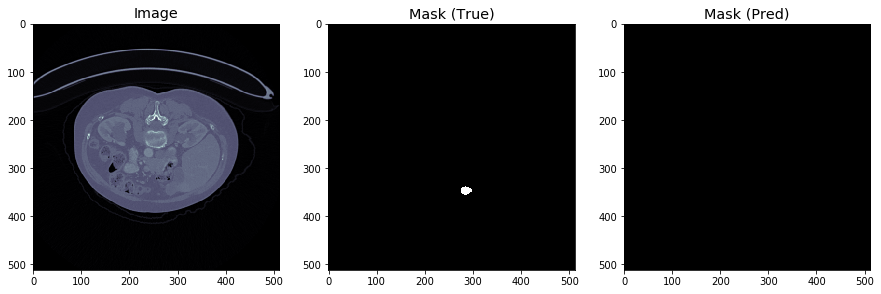

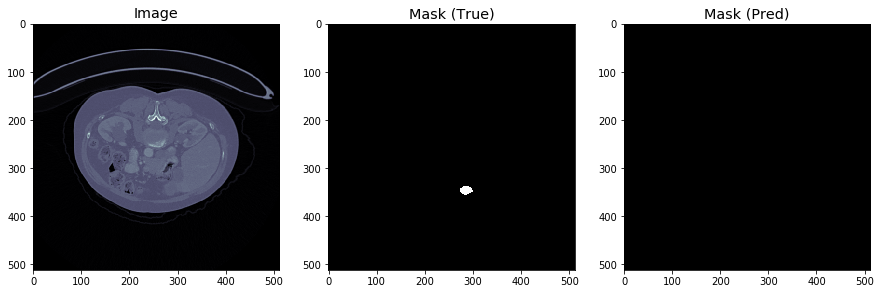

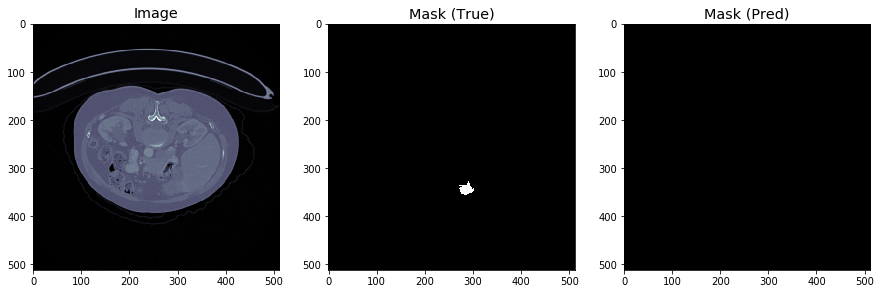

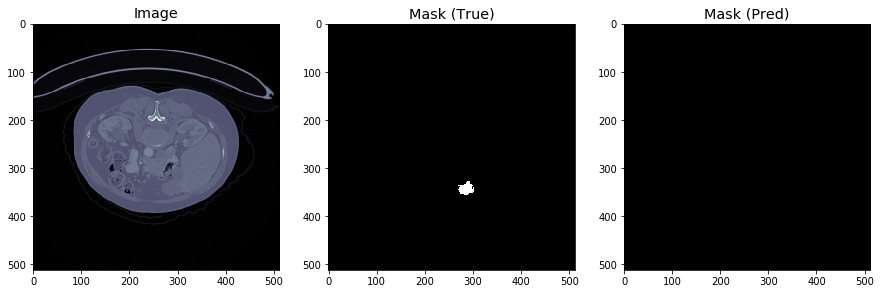

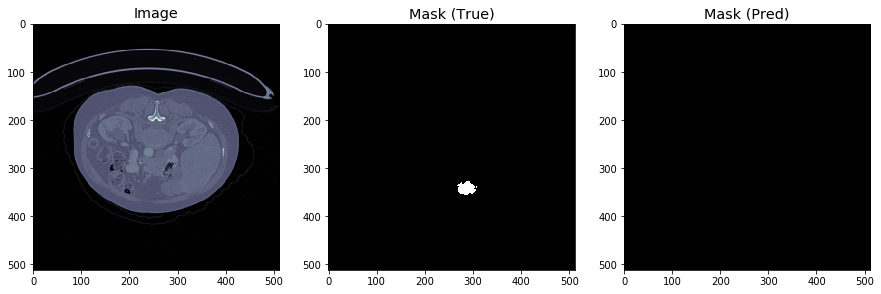

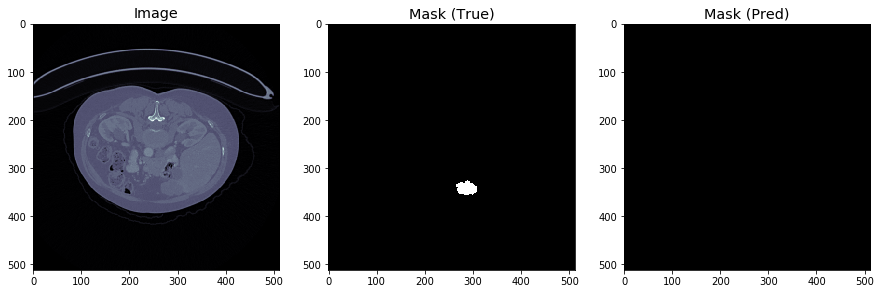

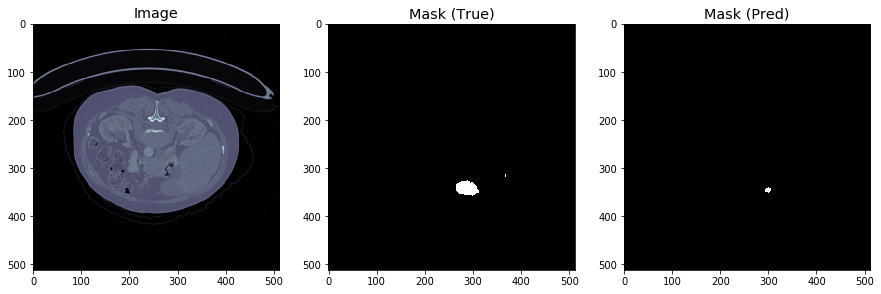

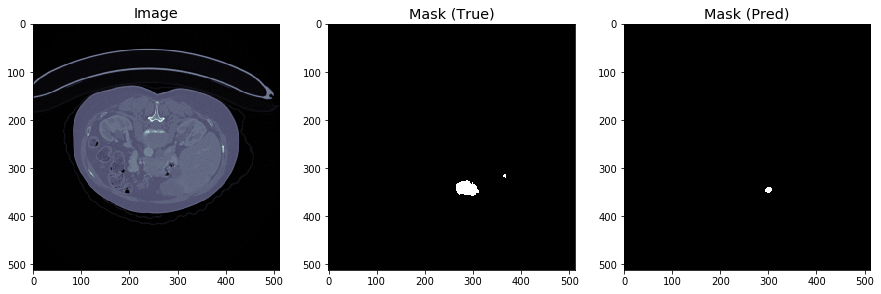

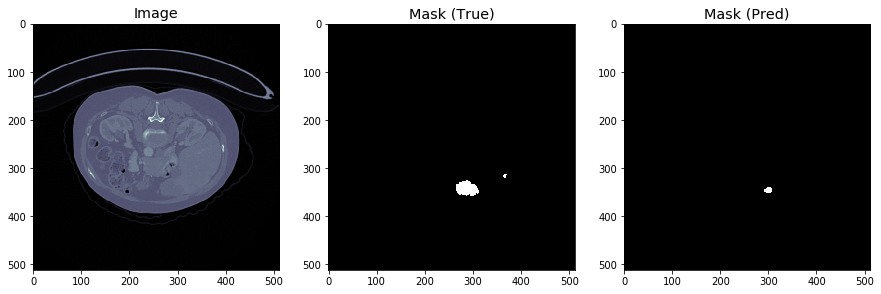

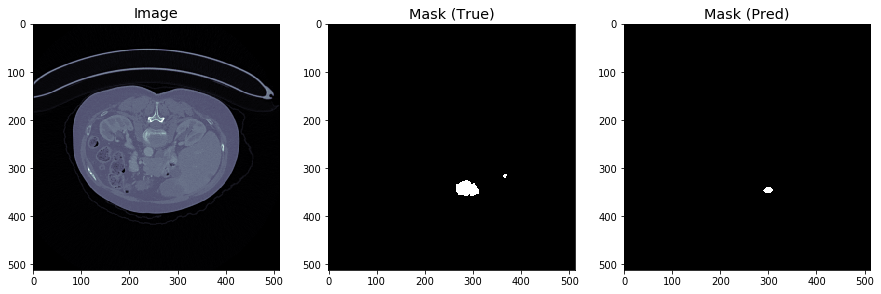

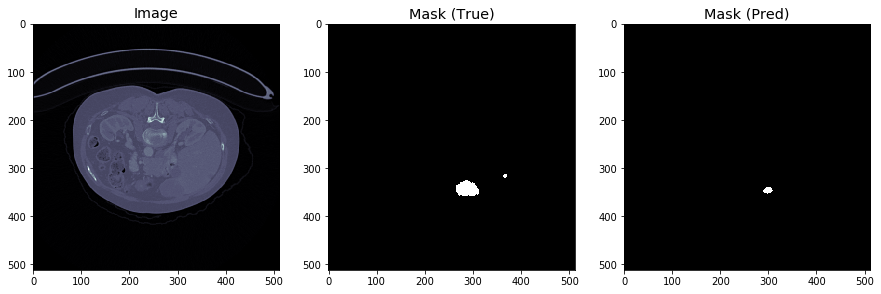

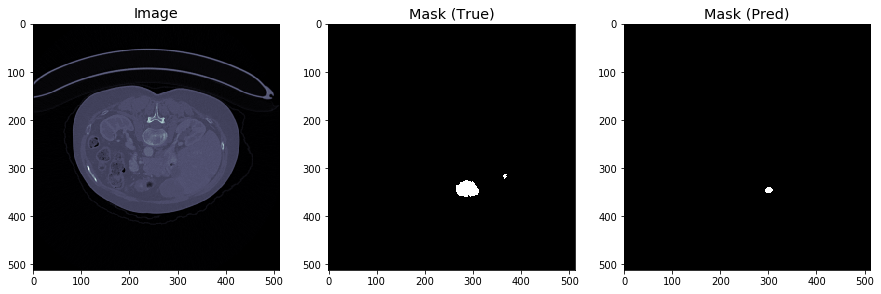

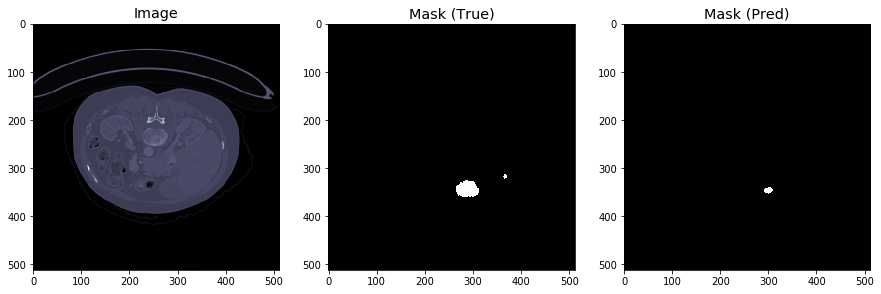

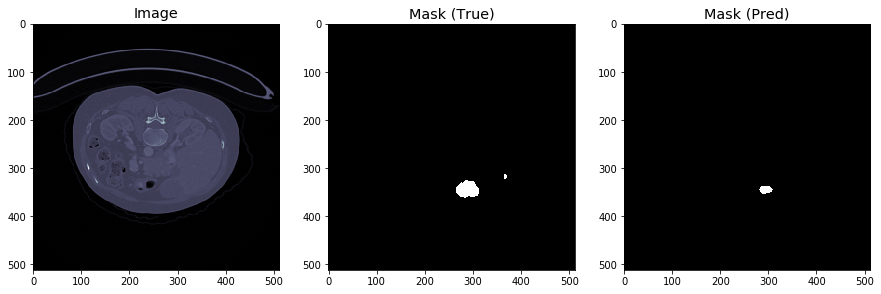

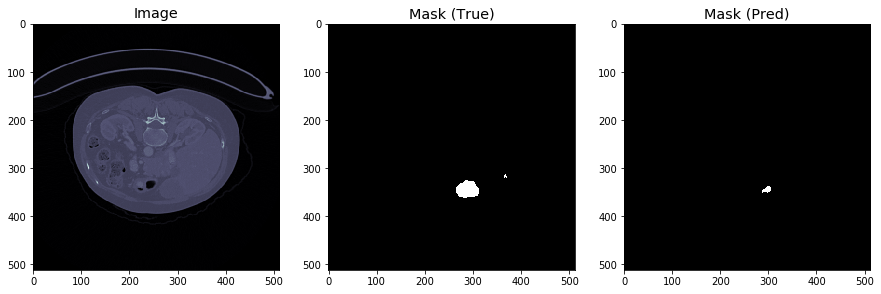

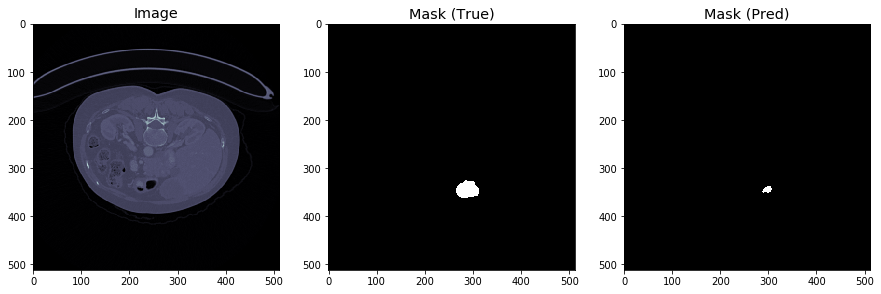

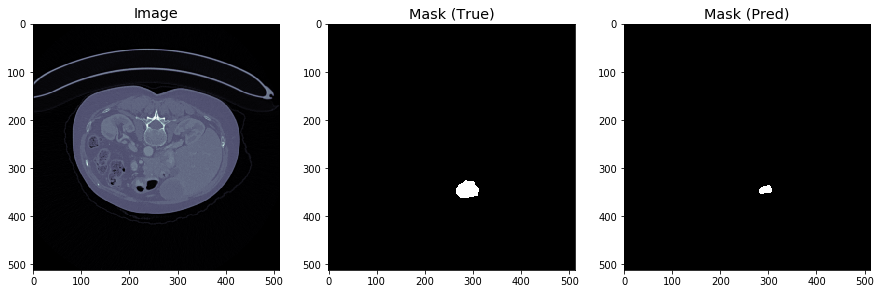

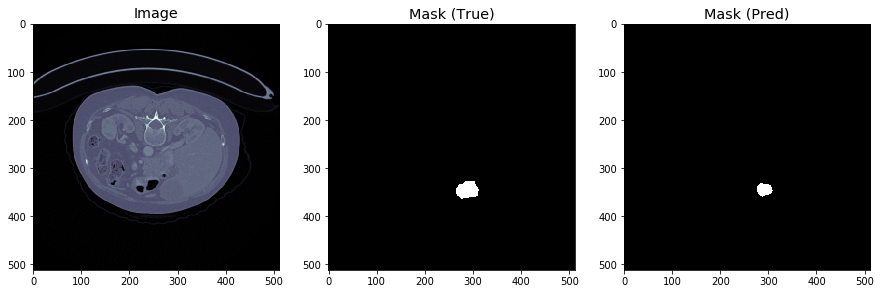

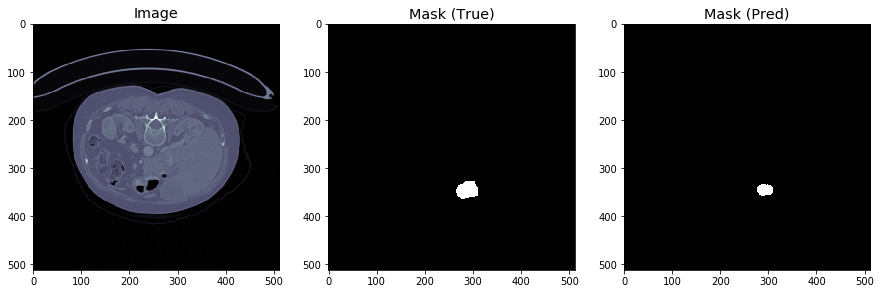

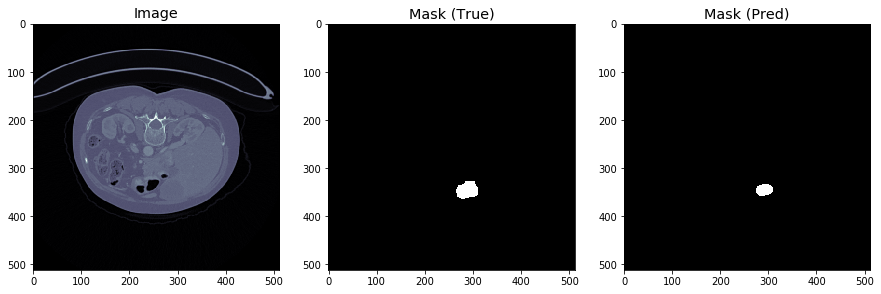

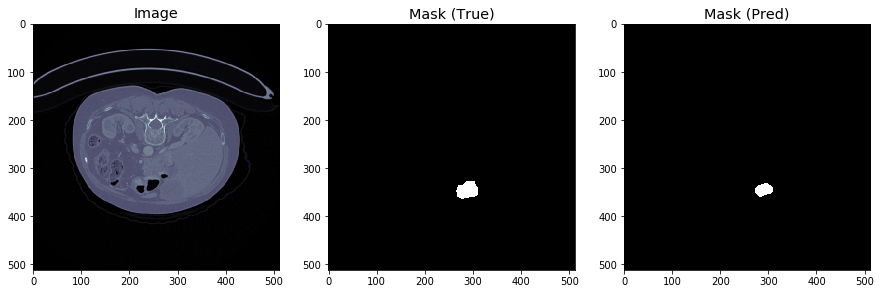

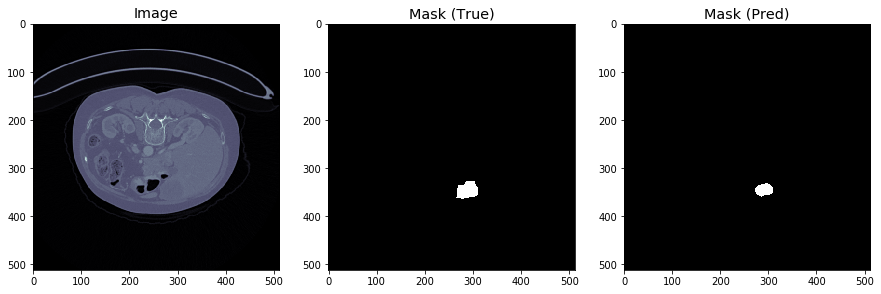

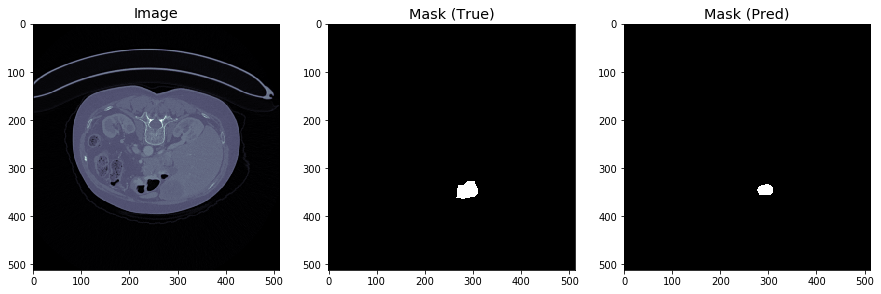

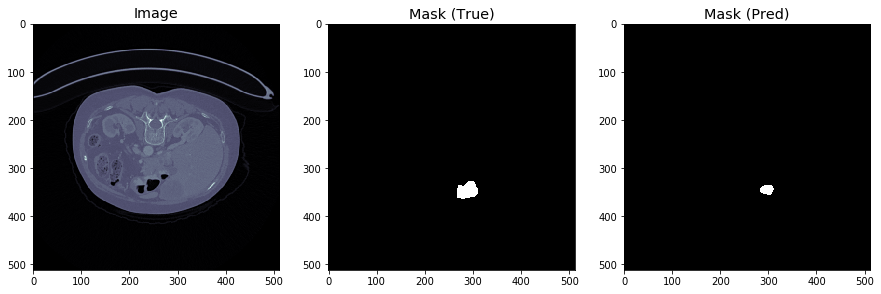

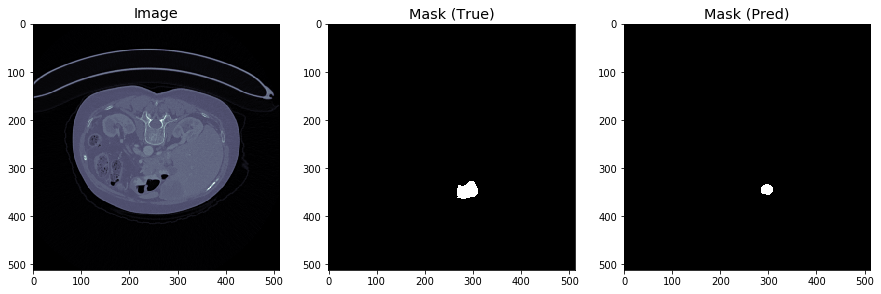

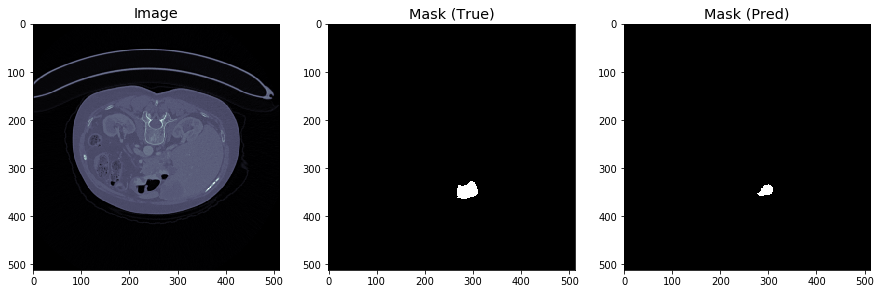

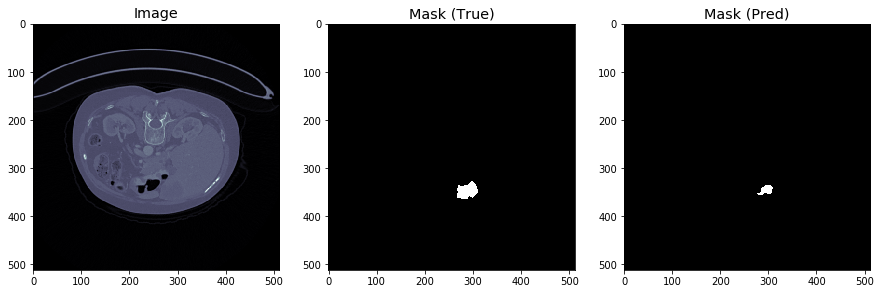

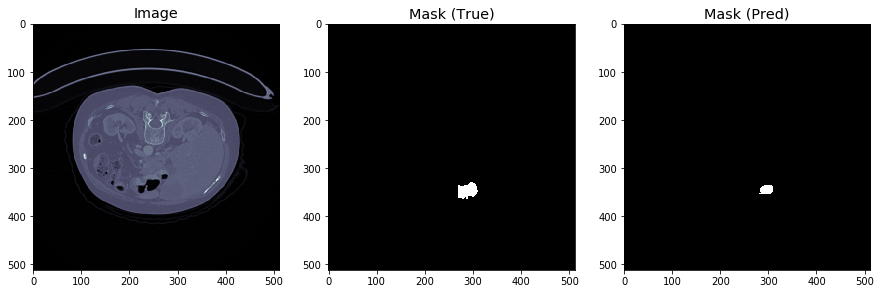

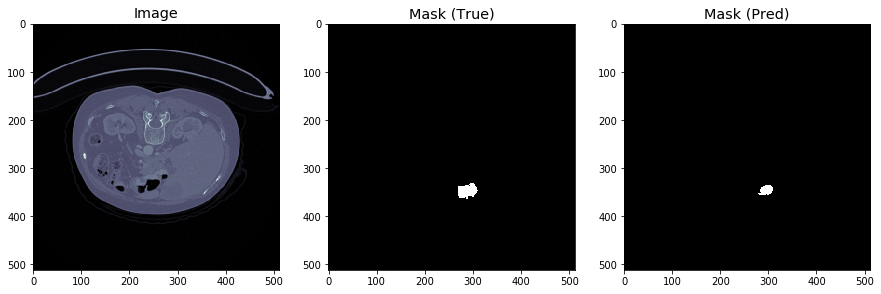

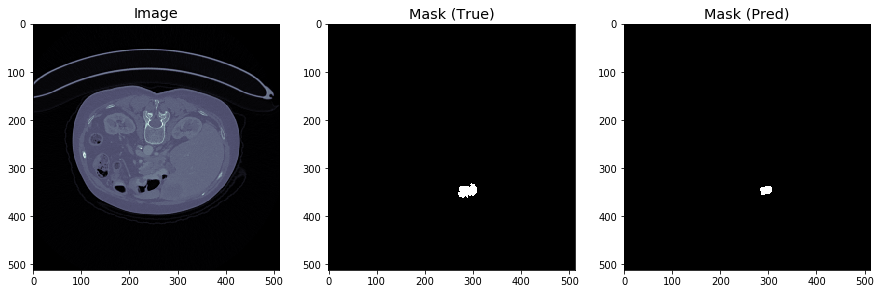

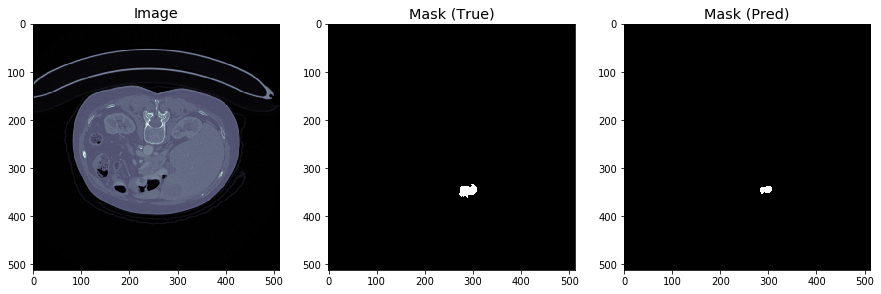

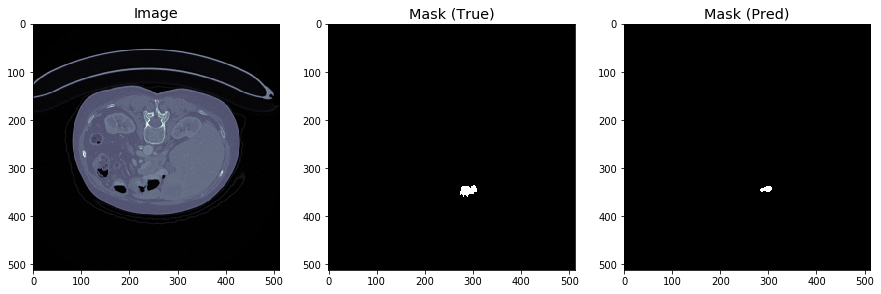

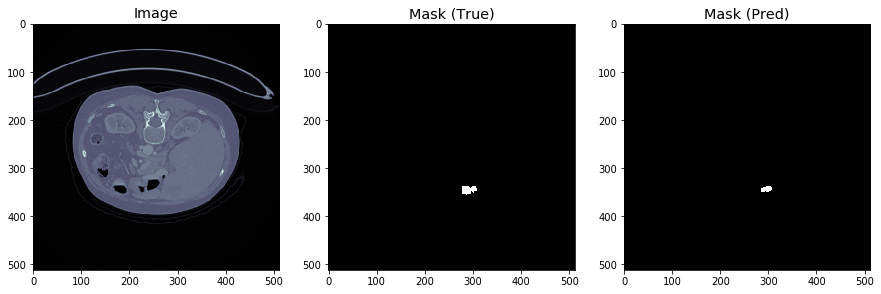

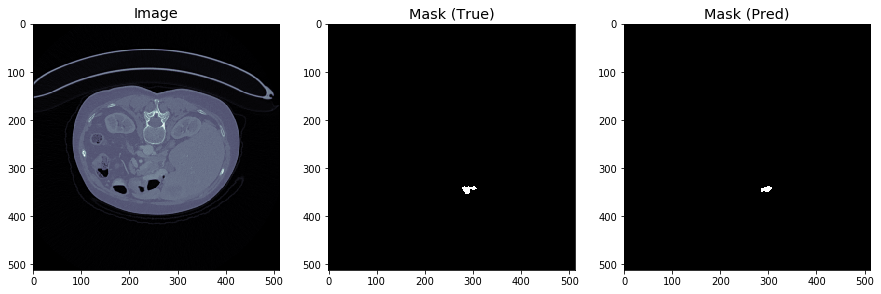

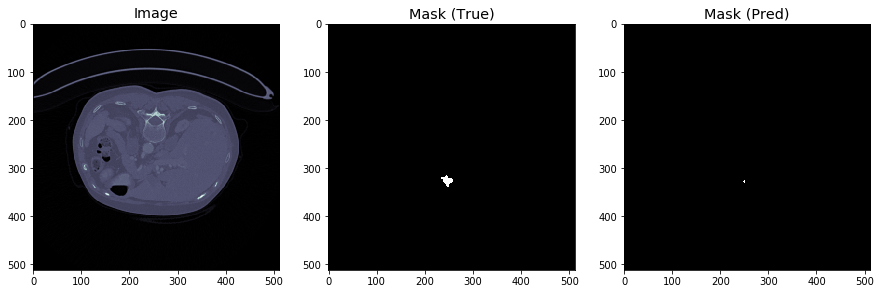

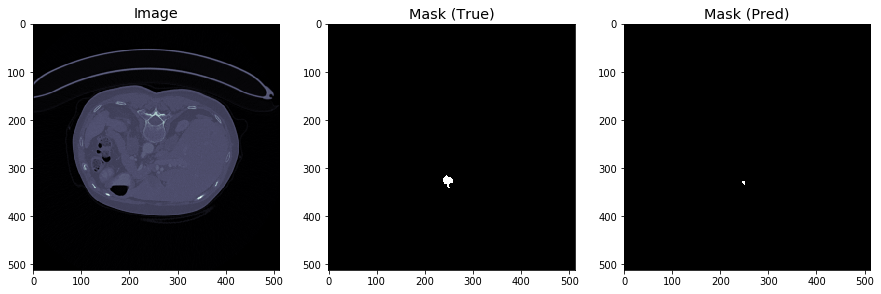

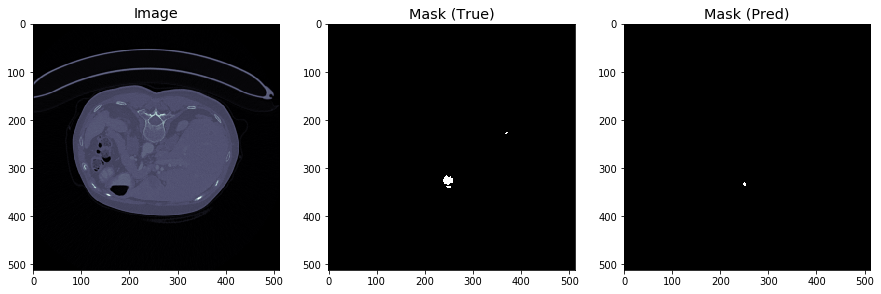

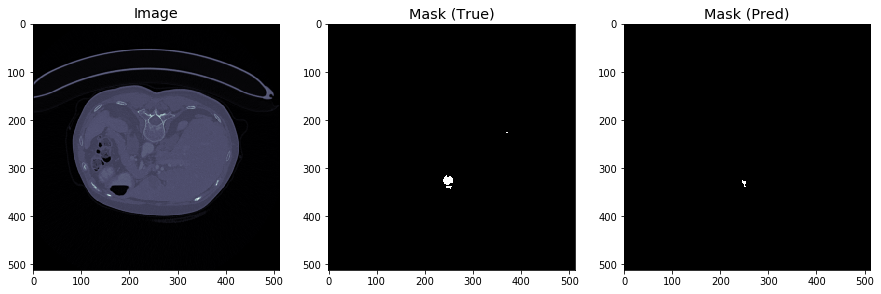

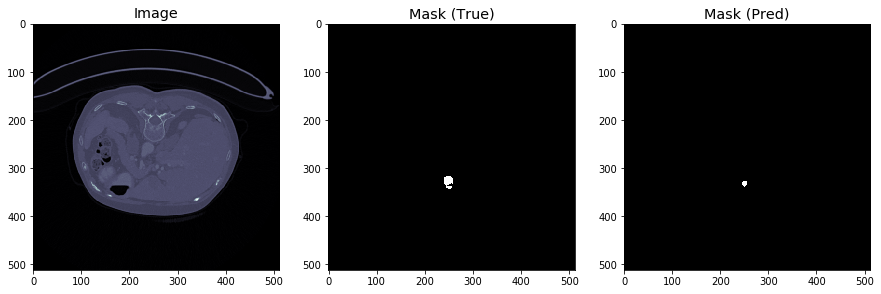

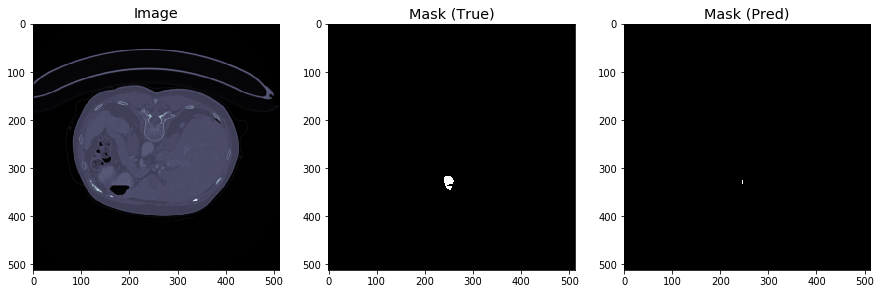

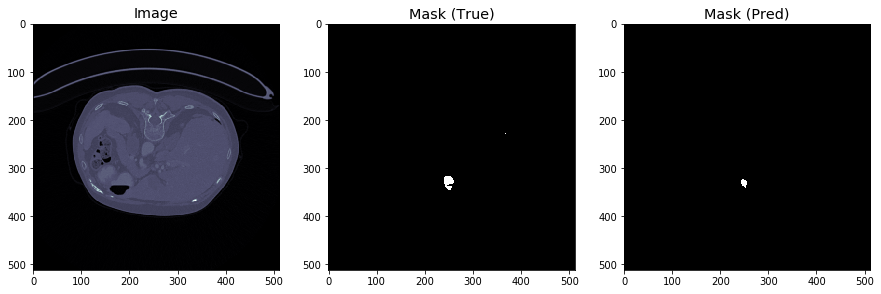

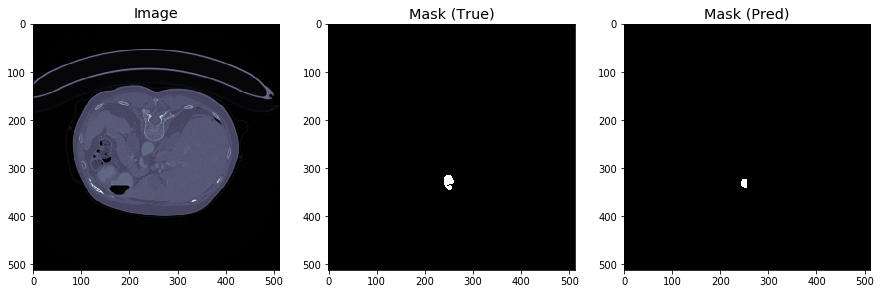

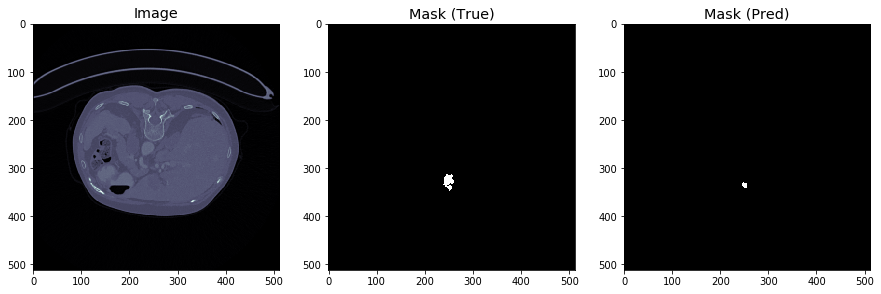

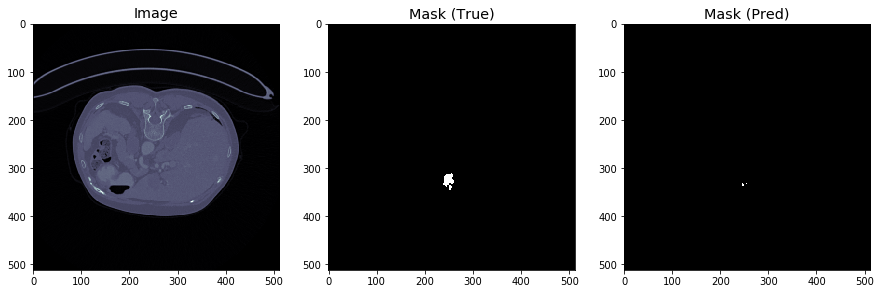

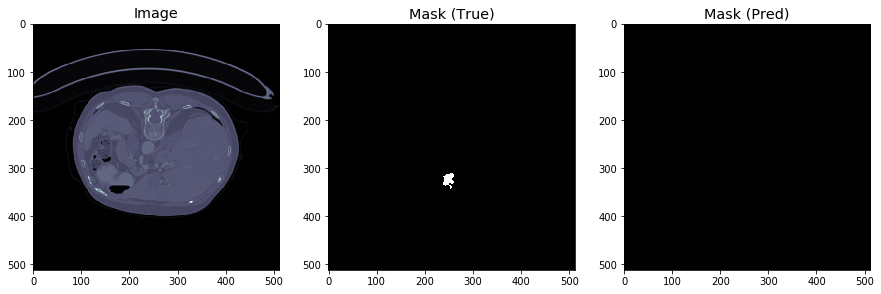

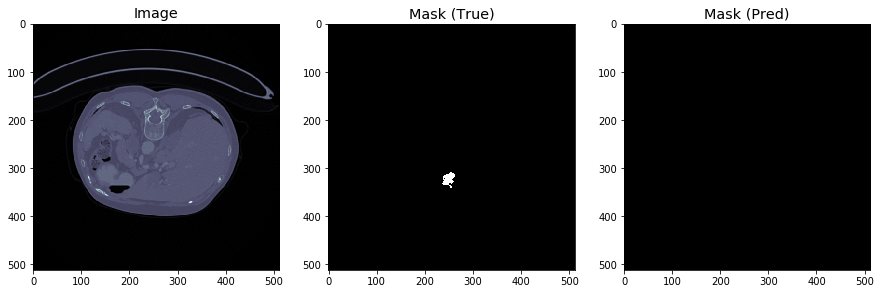

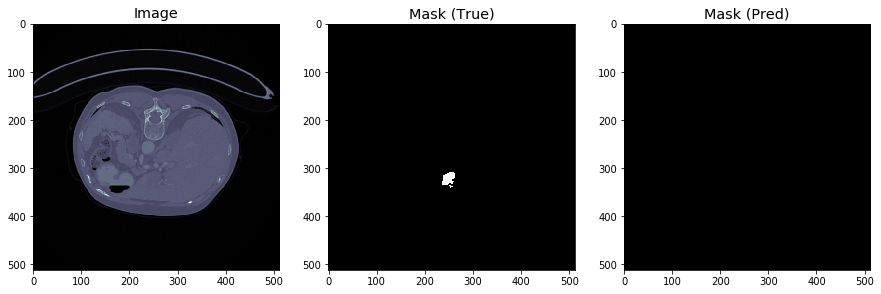

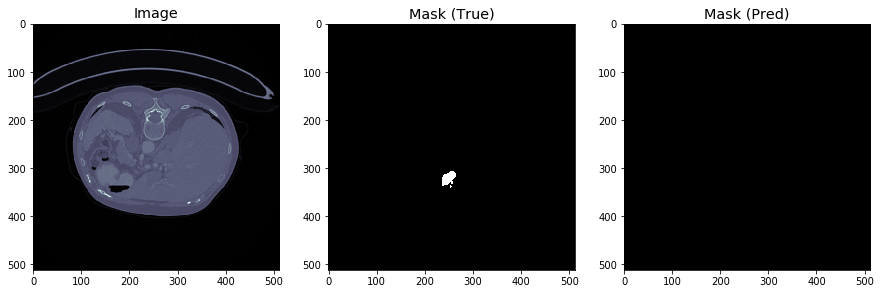

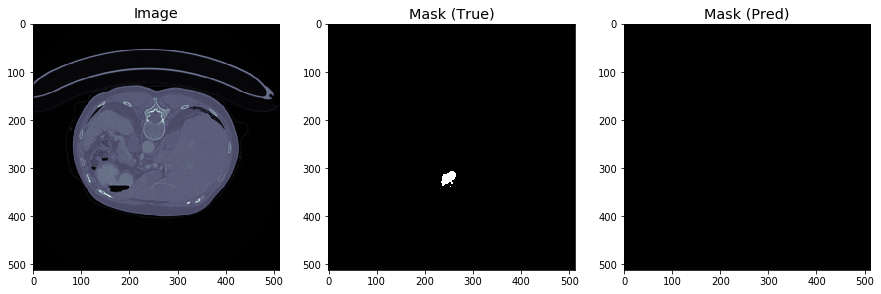

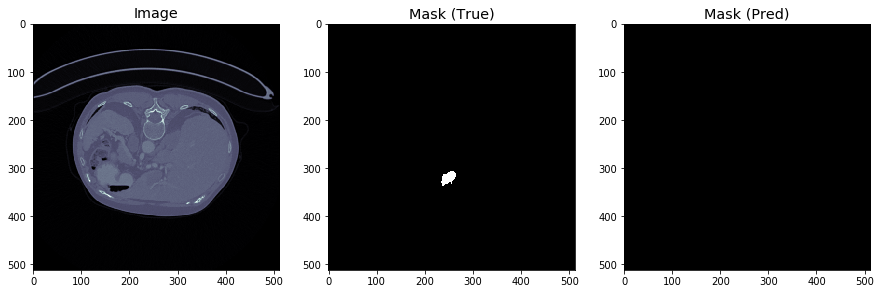

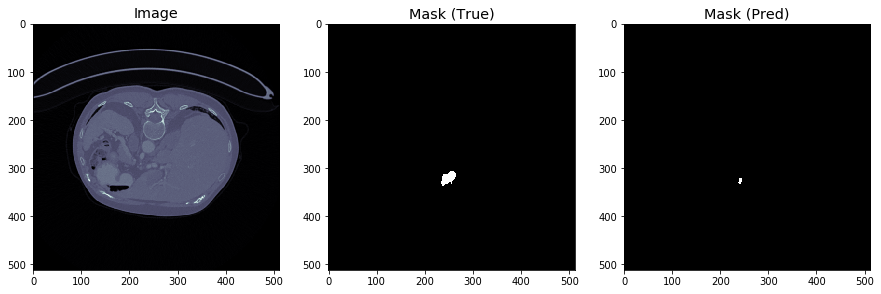

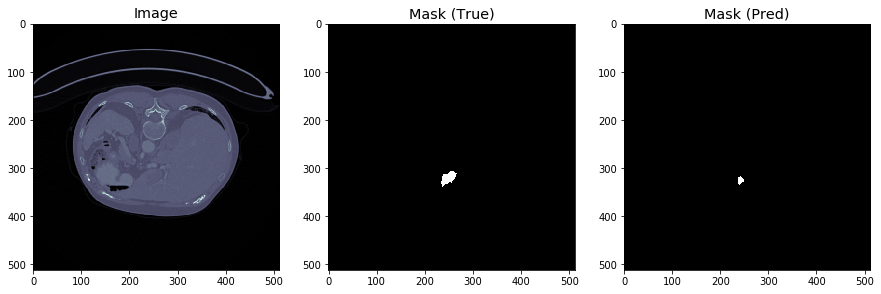

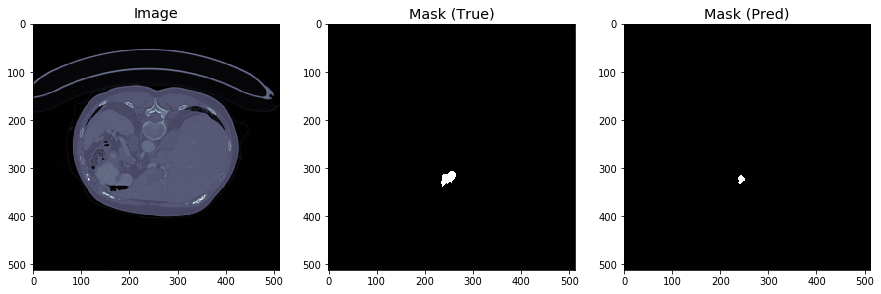

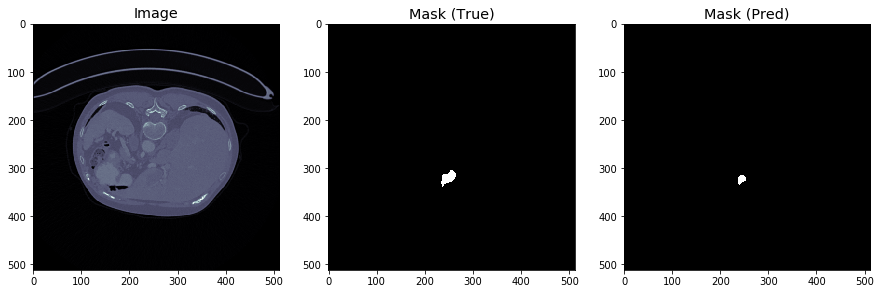

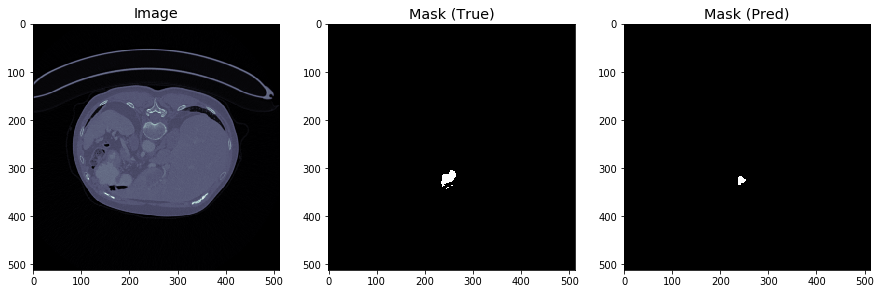

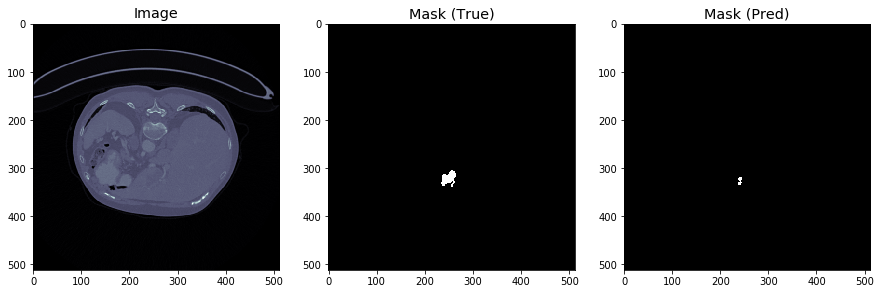

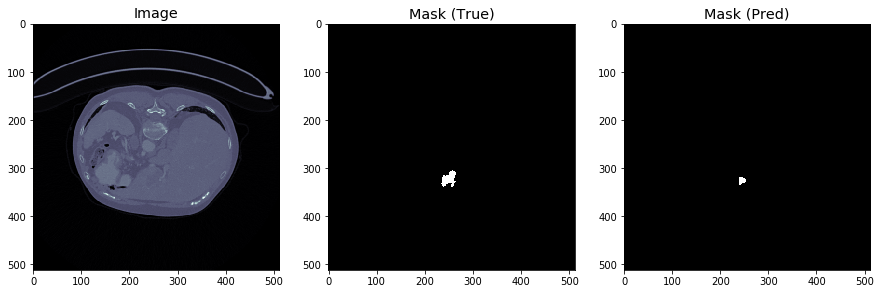

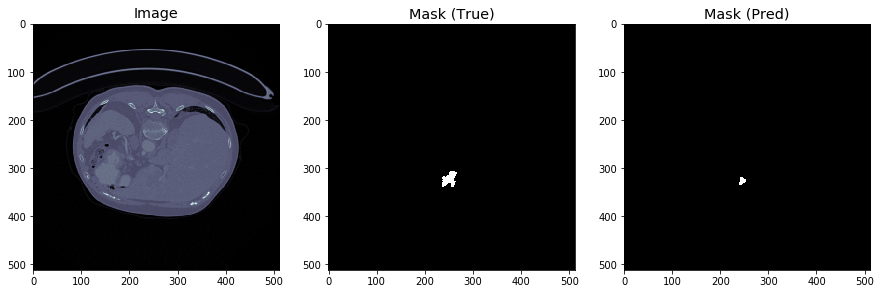

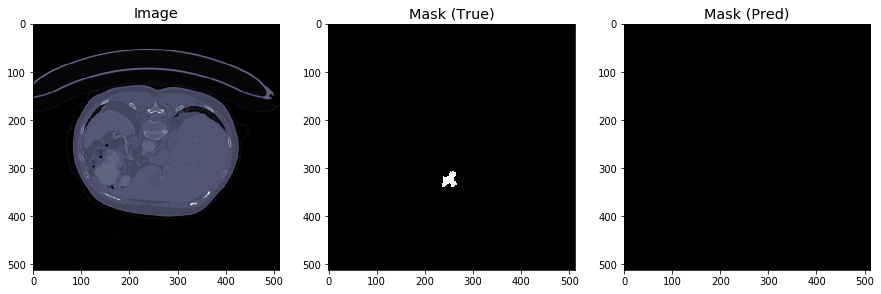

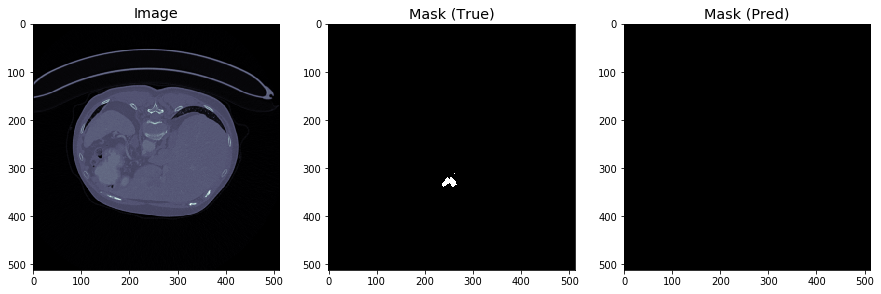

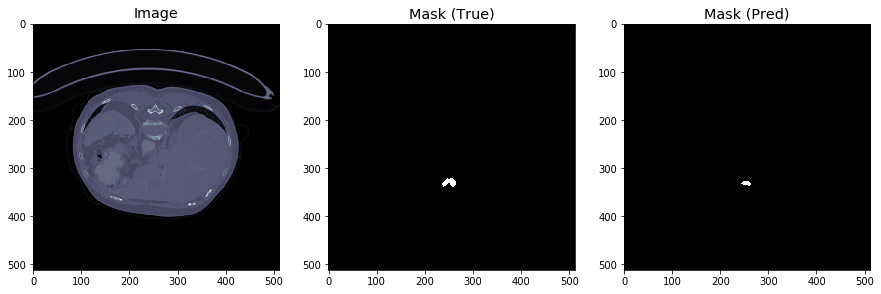

In [0]:
mask_ex[mask_ex == 1] = 0

for i in range(mask_ex.shape[2]):
    _, count = np.unique(mask_ex[:, :, i], return_counts=True)
    
    if len(count) > 1 and count[1] > 300:
        
        patch_ex = slice_to_patch(img_ex[:, :, i], patch_ratio)
        prediction = loaded_model.predict(patch_ex)
        prediction_mask = patch_to_slice(prediction, patch_ratio, input_shape, conf_threshold = 0.97)
        
        fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize = ((15, 15)))
        
        ax1.imshow(np.rot90(img_ex[:, :, i], 3), cmap = 'bone')
        ax1.set_title("Image", fontsize = "x-large")
        ax1.grid(False)
        ax2.imshow(np.rot90(mask_ex[:, :, i], 3), cmap = 'bone')
        ax2.set_title("Mask (True)", fontsize = "x-large")
        ax2.grid(False)
        ax3.imshow(np.rot90(prediction_mask.reshape((512, 512)), 3), cmap = 'bone')
        ax3.set_title("Mask (Pred)", fontsize = "x-large")
        ax3.grid(False)
        plt.show()

__Ex.2 : volum-26.nii __

In [0]:
img_ex = nib.load(img_path[36]).get_data()
mask_ex = nib.load(mask_path[36]).get_data()

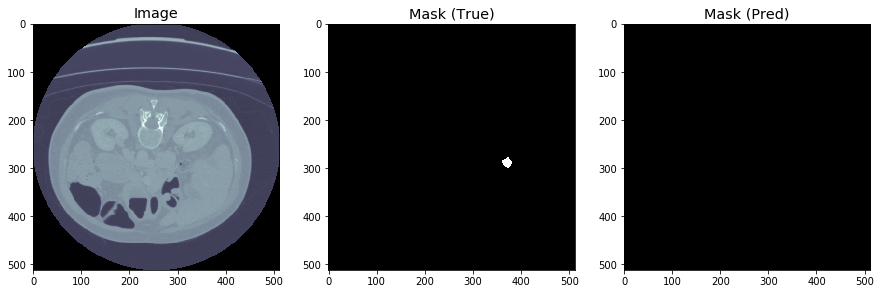

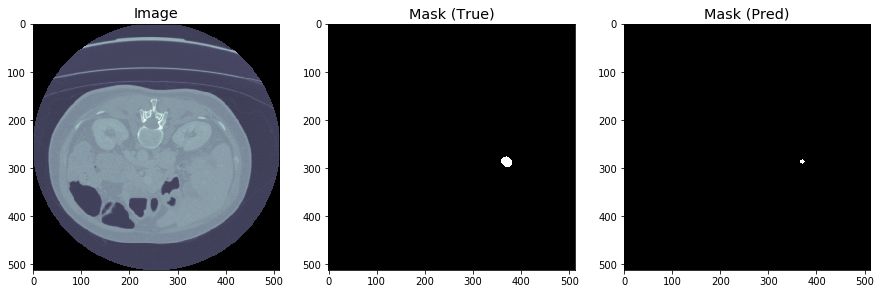

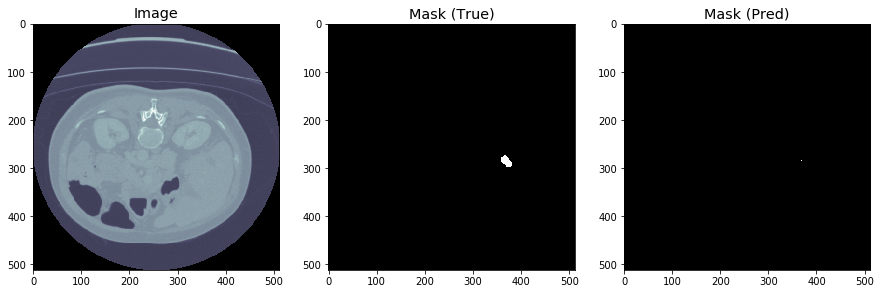

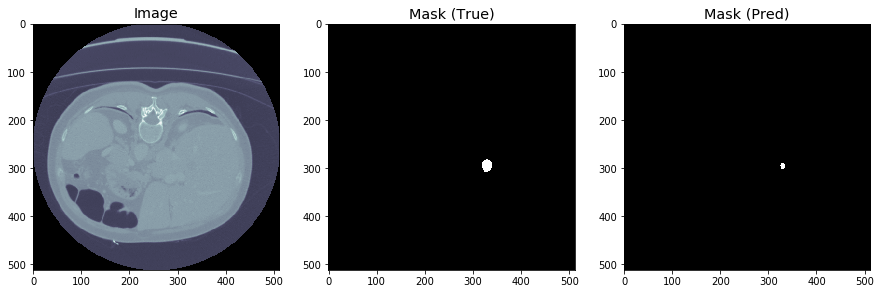

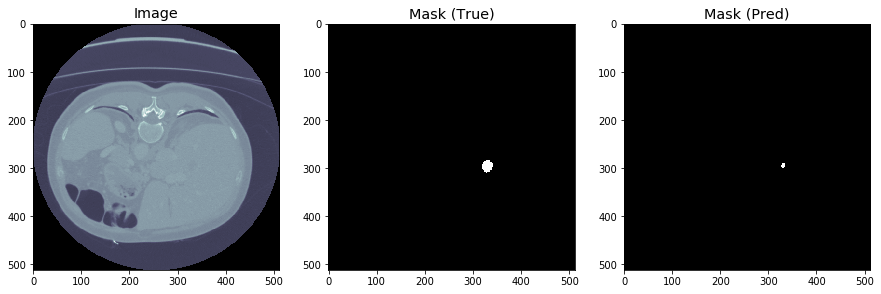

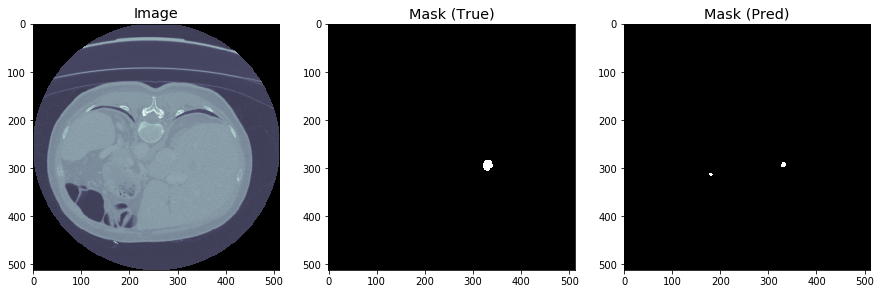

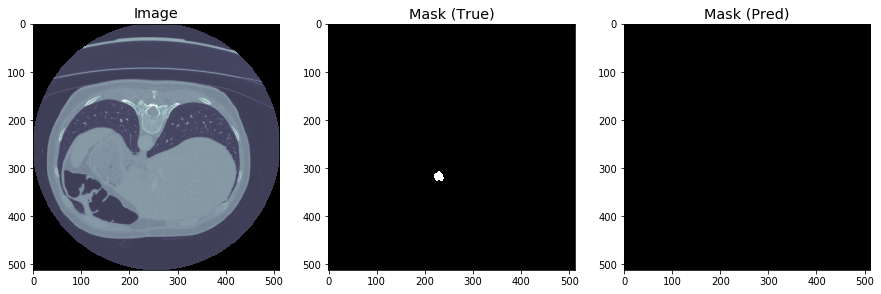

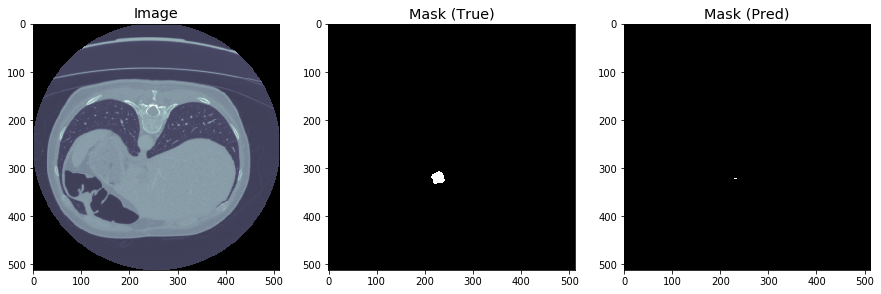

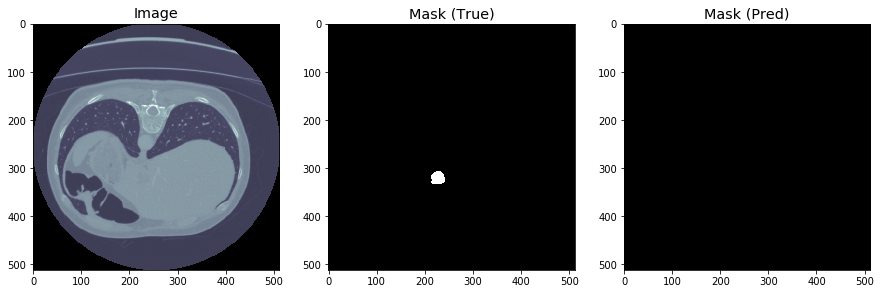

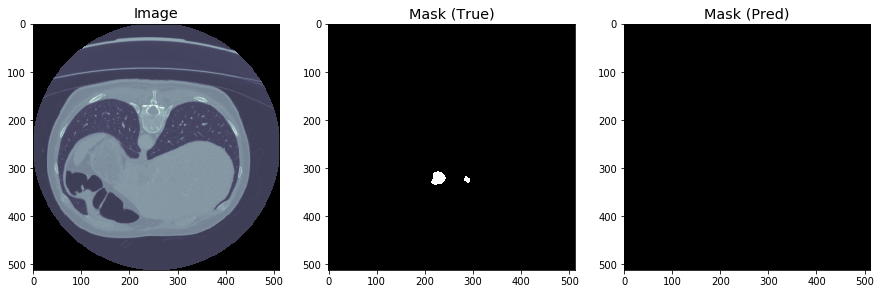

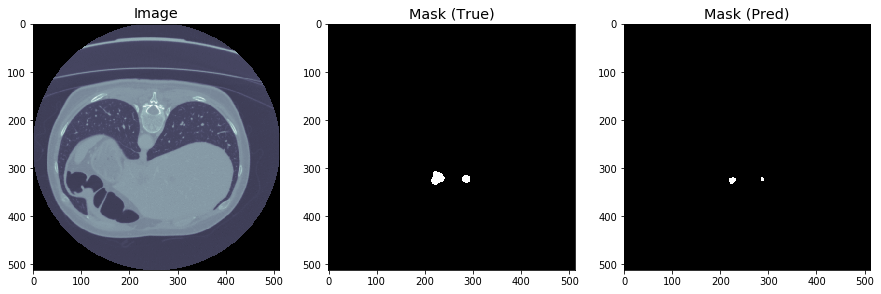

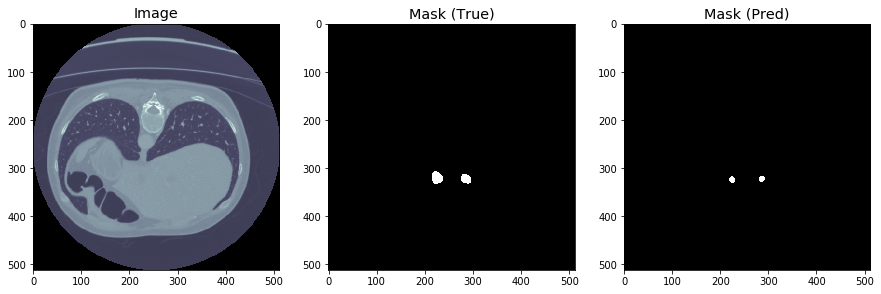

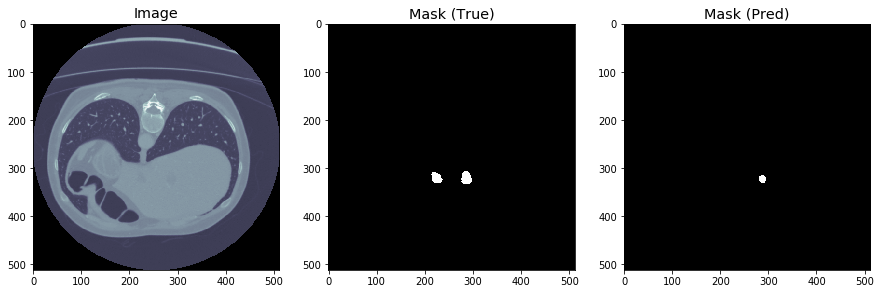

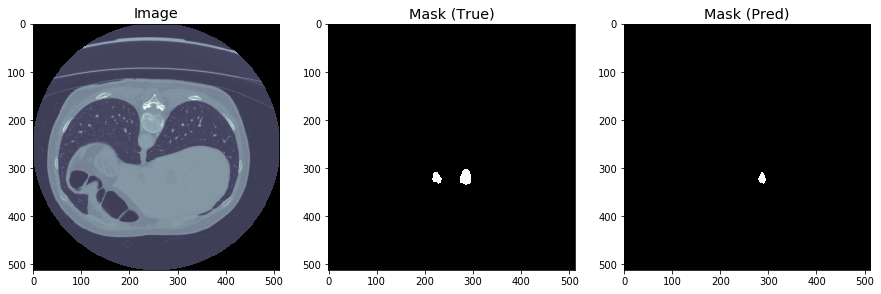

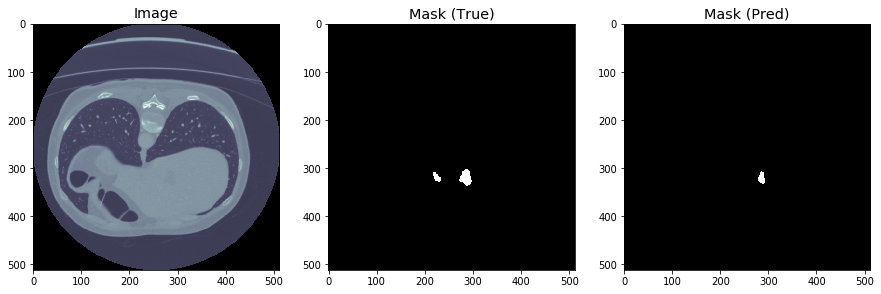

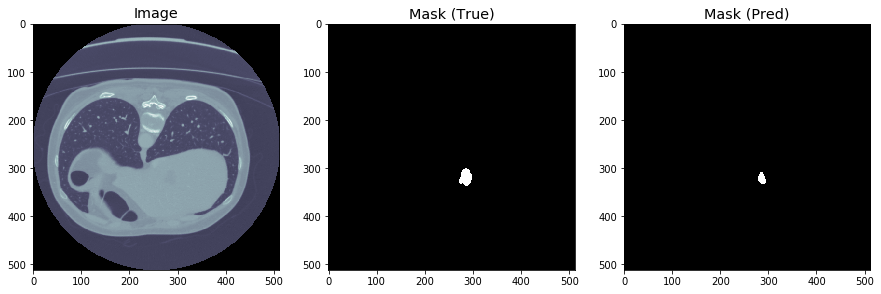

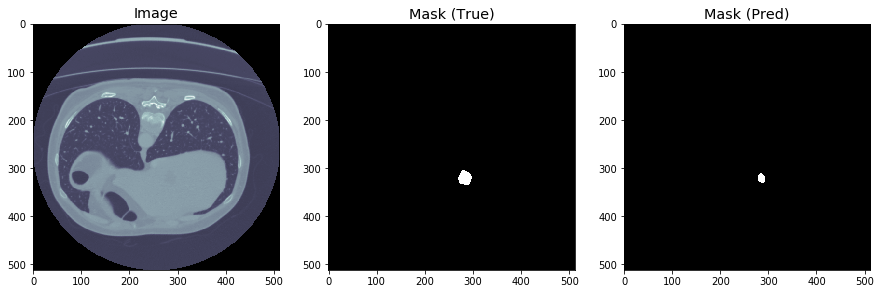

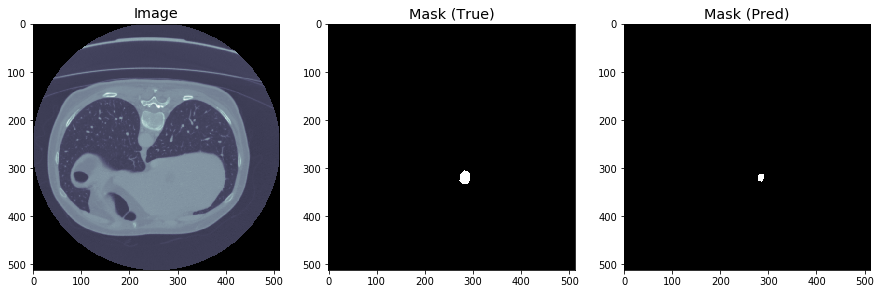

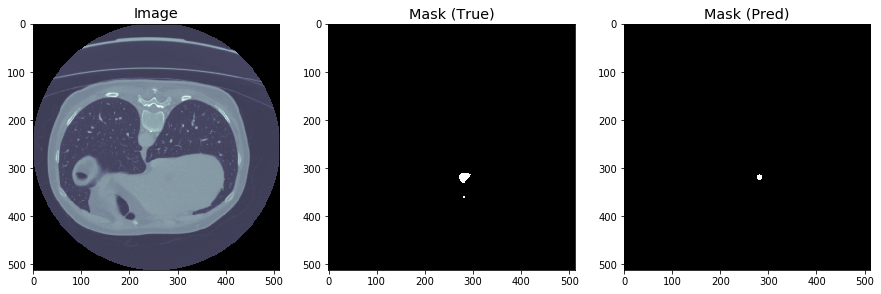

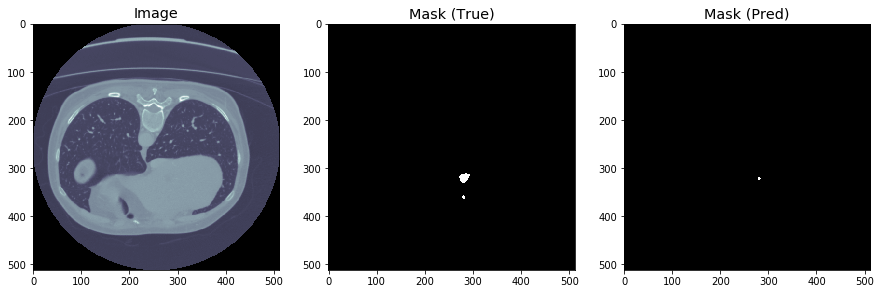

In [0]:
mask_ex[mask_ex == 1] = 0

for i in range(mask_ex.shape[2]):
    _, count = np.unique(mask_ex[:, :, i], return_counts=True)
    
    if len(count) > 1 and count[1] > 300:
        
        patch_ex = slice_to_patch(img_ex[:, :, i], patch_ratio)
        prediction = loaded_model.predict(patch_ex)
        prediction_mask = patch_to_slice(prediction, patch_ratio, input_shape, conf_threshold = 0.98)
        
        fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize = ((15, 15)))
        
        ax1.imshow(np.rot90(img_ex[:, :, i], 3), cmap = 'bone')
        ax1.set_title("Image", fontsize = "x-large")
        ax1.grid(False)
        ax2.imshow(np.rot90(mask_ex[:, :, i], 3), cmap = 'bone')
        ax2.set_title("Mask (True)", fontsize = "x-large")
        ax2.grid(False)
        ax3.imshow(np.rot90(prediction_mask.reshape((512, 512)), 3), cmap = 'bone')
        ax3.set_title("Mask (Pred)", fontsize = "x-large")
        ax3.grid(False)
        plt.show()

__Ex.3 : volum-27.nii __

In [0]:
img_ex = nib.load(img_path[27]).get_data()
mask_ex = nib.load(mask_path[27]).get_data()

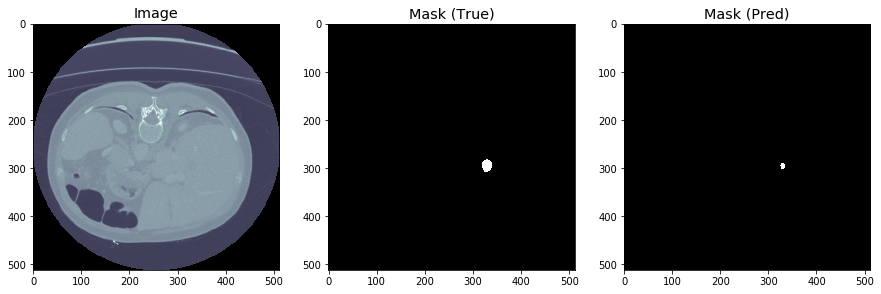

KeyboardInterrupt: ignored

In [0]:
mask_ex[mask_ex == 1] = 0

for i in range(mask_ex.shape[2]):
    _, count = np.unique(mask_ex[:, :, i], return_counts=True)
    
    if len(count) > 1 and count[1] > 400:
        
        patch_ex = slice_to_patch(img_ex[:, :, i], patch_ratio)
        prediction = loaded_model.predict(patch_ex)
        prediction_mask = patch_to_slice(prediction, patch_ratio, input_shape, conf_threshold = 0.98)
        
        fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize = ((15, 15)))
        
        ax1.imshow(np.rot90(img_ex[:, :, i], 3), cmap = 'bone')
        ax1.set_title("Image", fontsize = "x-large")
        ax1.grid(False)
        ax2.imshow(np.rot90(mask_ex[:, :, i], 3), cmap = 'bone')
        ax2.set_title("Mask (True)", fontsize = "x-large")
        ax2.grid(False)
        ax3.imshow(np.rot90(prediction_mask.reshape((512, 512)), 3), cmap = 'bone')
        ax3.set_title("Mask (Pred)", fontsize = "x-large")
        ax3.grid(False)
        plt.show()